<a href="https://colab.research.google.com/github/azkbrqlna/2025-PBO-Praktikum/blob/main/Jobsheet3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JOBSHEET 03: KONSTRUKTOR, DESTRUKTOR, DAN ENKAPSULASI

## A.	Tujuan Instruksional Khusus
Setelah menyelesaikan praktikum ini, mahasiswa diharapkan mampu:
1.	Menjelaskan dan menggunakan konstruktor (  init  ) dan destruktor (  del  )
2.	Memahami peran self dalam method sebuah kelas
3.	Menerapkan konsep enkapsulasi (encapsulation) dalam Python
4.	Menggunakan getter, setter, dan dekorator @property untuk mengelola akses atribut


## B. Langkah Praktikum

### Praktikum 01: Enkapsulasi pada kelas Bank Account

Berikut adalah contoh sederhana dalam Python yang mendemonstrasikan proses enkapsulasi (encapsulation). Enkapsulasi adalah konsep yang bertujuan untuk “menyembunyikan” atau melindungi data (atribut) di dalam suatu objek agar tidak diakses secara langsung di luar kelas, serta menyediakan metode (fungsi) khusus untuk memanipulasi data tersebut. UML kelas diagram kelas BankAccount.


•	Atribut Privat:

o	 owner: str
Menyimpan nama pemilik akun (tipe data string).

o	 balance: int
Menyimpan saldo akun (tipe data integer).

•	Metode Publik:
o	 init (owner: str, balance: int)
Konstruktor yang digunakan untuk menginisialisasi objek dengan parameter
owner dan balance.

o	deposit(amount: int): None
Metode untuk menambahkan saldo ke akun. Jika nilai amount lebih dari 0, maka nilai tersebut ditambahkan ke  balance.

o	withdraw(amount: int): None
Metode untuk menarik saldo. Melakukan validasi agar jumlah penarikan tidak melebihi saldo yang tersedia.

o	get_balance(): int
Metode untuk mengambil nilai saldo akun saat ini.
Diagram di atas memberikan gambaran mengenai struktur kelas BankAccount serta cara kerja enkapsulasi dalam mengatur atribut dan metode di dalam kelas.

Kemudian untuk kode praktikum dalam python dapat dilihat sebagai berikut:


In [ ]:
class BankAccount:
    def __init__(self, owner, balance):
        self.__owner = owner
        self.__balance = balance

    def deposit(self, amount):
        """Method untuk menambahkan saldo."""
        if amount > 0:
            self.__balance += amount
            print(f"{amount} telah ditambahkan ke akun {self.__owner}.")
        else:
            print("Jumlah deposit harus lebih dari 0.")

    def withdraw(self, amount):
        """Method untuk menarik saldo."""
        if amount <= self.__balance:
            self.__balance -= amount
            print(f"{amount} telah ditarik dari akun {self.__owner}.")
        else:
            print("Saldo tidak mencukupi.")

    def get_balance(self):
        """Method untuk mendapatkan informasi saldo terkini."""
        return self.__balance

# contoh penggunaan
if __name__ == "__main__":
    # Membuat objek BankAccount dengan owner="Alice" dan balance awal
    alice_account = BankAccount(owner="Alice", balance=1000)

    # Deposit uang
    alice_account.deposit(500)     # Berhasil
    alice_account.deposit(-100)    # Gagal (validasi)

    # Withdraw uang
    alice_account.withdraw(300)    # Berhasil
    alice_account.withdraw(2000)   # Gagal (saldo tidak cukup)

    # Mendapatkan saldo
    current_balance = alice_account.get_balance()
    print(f"Saldo terakhir di akun Alice: {current_balance}")


  # Mencoba mengakses atribut 'private' langsung (tidak direkomendasikan)
  # alice_account.  balance # Akan error
  # Karena Python “mangling” nama atribut __balance menjadi BankAccount__balance
  # Ini adalah salah satu mekanisme enkapsulasi sederhana di Python.

500 telah ditambahkan ke akun Alice.
Jumlah deposit harus lebih dari 0.
300 telah ditarik dari akun Alice.
Saldo tidak mencukupi.
Saldo terakhir di akun Alice: 1200


#### Penjelasan
1.	Atribut Private: Di Python, penulisan  nama_atribut membuat nama atribut tersebut di-“mangled” sehingga tidak dapat diakses langsung dari luar kelas dengan nama aslinya. Contoh:  balance menjadi _BankAccount balance. Ini bukan perlindungan mutlak, tetapi menjadi sinyal kuat bahwa atribut tersebut tidak untuk diakses sembarangan.
2.	Metode Akses (Get/Set): Konsep “getter” atau “setter” diterapkan untuk mengontrol validasi  dan  logika  ketika  atribut  diubah.  Di  contoh  ini, method deposit() dan withdraw() melindungi  balance dari perubahan langsung dengan menambahkan sejumlah kondisi (validasi).
3.	Keuntungan Enkapsulasi:

  •	Memudahkan perawatan kode (maintenance) karena data tidak diubah sembarangan.

  •	Mempermudah menambahkan validasi/pengecekan keamanan (security check).

  • Mengontrol akses terhadap data, sehingga lebih mudah dikelola.
Meski Python tidak memiliki sistem enkapsulasi “private”/“protected” secara ketat seperti beberapa bahasa pemrograman lain, penulisan underscore ganda dan pendekatan getter/setter tetap menjadi praktik umum untuk menegaskan bahwa atribut atau metode tersebut bersifat internal.



### Praktikum 02: Enkapsulasi pada kelas Employee

Berikut ini adalah contoh lain tentang enkapsulasi dalam Python menggunakan kelas Employee yang menyembunyikan data karyawan, seperti nama dan gaji, dari akses langsung di luar kelas. Pada contoh ini, kita menyediakan method khusus (getter dan setter) untuk mengakses dan memodifikasi data privat. UML kelas diagram untuk Employee Class.

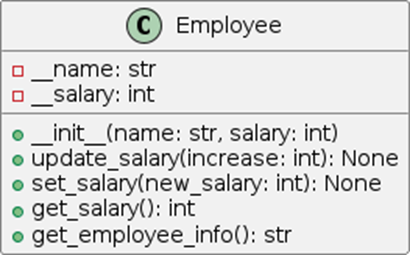

•	Atribut Privat (-):

o	  name: str → Menyimpan nama karyawan.

o	  salary: int → Menyimpan gaji karyawan.

•	Metode Publik (+):

o	  init  (name, salary) → Konstruktor untuk inisialisasi nama dan gaji.

o	update_salary(increase) → Menambahkan gaji jika nilai kenaikan valid.

o	set_salary(new_salary) → Mengatur ulang gaji dengan validasi.

o	get_salary() → Mengembalikan nilai gaji saat ini.

o	get_employee_info() → Menampilkan info lengkap tentang karyawan.


In [ ]:
class Employees:
    def __init__(self, name, salary):
        self._name = name
        self.__salary = salary

    def update_salary(self, increase):
        """Method untuk menaikkan gaji dengan validasi."""
        if increase > 0:
            self.__salary += increase
            print(f"Gaji telah dinaikkan sebesar {increase}.")
        else:
            print("Nilai kenaikan harus lebih dari 0.")

    def set_salary(self, new_salary):
        """Method untuk mengubah gaji dengan validasi."""
        if new_salary >= 0:
            self.__salary = new_salary
            print(f"Gaji diatur ulang menjadi {new_salary}.")
        else:
            print("Gaji tidak dapat bernilai negatif.")

    def get_salary(self):
        """Method untuk mendapatkan informasi gaji."""
        return self.__salary

    def get_employee_info(self):
        """Method untuk menampilkan informasi karyawan secara menyeluruh."""
        return f"Employee: {self._name}, Gaji: {self.__salary}"

# Contoh penggunaan
if __name__ == "__main__":
    # Membuat objek Employee dengan nama "John Doe" dan gaji awal 50000
    employee1 = Employees("John Doe", 50000)

    # Tampilkan informasi karyawan
    print(employee1.get_employee_info())

    # Update gaji dengan menaikkan sebesar 5000
    employee1.update_salary(5000)
    print(f"Gaji setelah kenaikan: {employee1.get_salary()}")

    # Atur ulang gaji dengan nilai baru
    employee1.set_salary(60000)
    print(f"Informasi terbaru: {employee1.get_employee_info()}")

    # Mencoba mengakses atribut privat secara langsung (tidak direkomendasikan)
    # Contoh: print(employee1.__salary) --> Ini akan menimbulkan error

Employee: John Doe, Gaji: 50000
Gaji telah dinaikkan sebesar 5000.
Gaji setelah kenaikan: 55000
Gaji diatur ulang menjadi 60000.
Informasi terbaru: Employee: John Doe, Gaji: 60000


#### Penjelasan
1.	Atribut Privat

  •	Atribut   name dan   salary dimulai dengan dua garis bawah (double underscore), yang menandakan bahwa atribut tersebut bersifat privat.

  •	Python melakukan name mangling sehingga atribut ini tidak dapat diakses secara langsung dari luar kelas, melainkan harus menggunakan method yang disediakan.

2.	Method untuk Memodifikasi Data

  •	update_salary(): Menambahkan nilai kenaikan ke gaji saat ini dengan validasi bahwa nilai kenaikan harus positif.

  •	set_salary(): Mengatur nilai gaji secara langsung asalkan nilai tersebut tidak negatif.

3.	Method untuk Mengakses Data

  •	get_salary(): Mengembalikan nilai gaji saat ini.

  •	get_employee_info(): Mengembalikan informasi lengkap tentang karyawan termasuk nama dan gaji.

4.	Keuntungan Enkapsulasi
  •	Data sensitif seperti gaji disembunyikan sehingga hanya dapat diubah melalui method yang telah ditentukan.

  •	Validasi data dilakukan di dalam method untuk menjaga agar nilai yang tidak valid tidak masuk ke atribut.

  •	Menjaga integritas data dan memudahkan perawatan kode.
  
Dengan pendekatan ini, kita memastikan bahwa data dalam objek Employee aman dari modifikasi secara langsung dari luar kelas dan hanya dapat diubah melalui operasi yang telah diatur sesuai logika bisnis.


### Praktikum 03: Konstruktor dan Destruktor Sederhana

Berikut adalah contoh program sederhana yang mendemonstrasikan cara kerja konstruktor dan destruktor dalam Python:

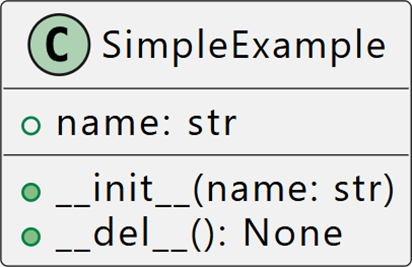

•	Atribut:

o	name: str → Atribut publik yang disimpan saat objek dibuat.

•	Method:

o	  init  (name: str) → Konstruktor yang dipanggil saat objek diinisialisasi.

o	 del () → Destruktor yang dipanggil saat objek dihapus (baik secara eksplisit dengan del atau otomatis oleh garbage collector).


In [1]:
class SimpleExample:
    def __init__(self, name):
        """
        Konstruktor: Dipanggil saat objek dibuat.
        Menyimpan nilai 'name' dan mencetak pesan pembuatan objek.
        """
        self.name = name
        print(f"Konstruktor: Objek '{self.name}' telah dibuat.")

    def __del__(self):
        """
        Destruktor: Dipanggil saat objek dihapus.
        Mencetak pesan bahwa objek sedang dihapus.
        """
        print(f"Destruktor: Objek '{self.name}' sedang dihapus.")


def main():
    print("Program dimulai.\n")

    # Membuat objek SimpleExample
    obj = SimpleExample("Demo")
    print("Program sedang berjalan...\n")

    # Menghapus objek secara eksplisit
    del obj
    print("Objek telah dihapus secara eksplisit.\n")

    print("Program selesai.")


if __name__ == "__main__":
    main()

Program dimulai.

Konstruktor: Objek 'Demo' telah dibuat.
Program sedang berjalan...

Destruktor: Objek 'Demo' sedang dihapus.
Objek telah dihapus secara eksplisit.

Program selesai.
